# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import datetime 
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}units=Metric&q={city}&appid={weather_api_key}'
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    #     # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
    #     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    #       Append the City information into city_data list  
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | sambava
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | san antonio
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | sittwe
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | kuching
Processing Record 22 of

Processing Record 40 of Set 4 | cururupu
Processing Record 41 of Set 4 | sisimiut
Processing Record 42 of Set 4 | belyy yar
Processing Record 43 of Set 4 | kununurra
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | valledupar
Processing Record 46 of Set 4 | tokar
Processing Record 47 of Set 4 | mirpur sakro
Processing Record 48 of Set 4 | mount pearl
Processing Record 49 of Set 4 | guixi
Processing Record 0 of Set 5 | segou
Processing Record 1 of Set 5 | changji
Processing Record 2 of Set 5 | berdigestyakh
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | kazerun
Processing Record 5 of Set 5 | al wajh
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | kerikeri
Processing Record 8 of Set 5 | natal
Processing Record 9 of Set 5 | arteche
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | meizhou
Processing Record 12 of Set 5 | egilsstadir
Processing Record 13 of Set 5 | askoy
Processing Record 14 o

Processing Record 32 of Set 8 | firmat
Processing Record 33 of Set 8 | suva
Processing Record 34 of Set 8 | kingston
Processing Record 35 of Set 8 | acarau
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | palu
Processing Record 38 of Set 8 | griffith
Processing Record 39 of Set 8 | grahamstown
Processing Record 40 of Set 8 | fujieda
Processing Record 41 of Set 8 | cabo san lucas
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | deming
Processing Record 44 of Set 8 | al kharj
Processing Record 45 of Set 8 | ouezzane
Processing Record 46 of Set 8 | urzhar
Processing Record 47 of Set 8 | marsabit
Processing Record 48 of Set 8 | mugia
Processing Record 49 of Set 8 | vilyuysk
Processing Record 0 of Set 9 | pangody
Processing Record 1 of Set 9 | kashgar
Processing Record 2 of Set 9 | taro
Processing Record 3 of Set 9 | kapa'a
Processing Record 4 of Set 9 | ribeira brava
Processing Record 5 of Set 9 | codrington
Processing Record 6 of Set 9 | co

Processing Record 21 of Set 12 | spring creek
Processing Record 22 of Set 12 | labytnangi
Processing Record 23 of Set 12 | blagoveshchenka
Processing Record 24 of Set 12 | nushki
Processing Record 25 of Set 12 | sindangan
Processing Record 26 of Set 12 | prince george
Processing Record 27 of Set 12 | villa angela
Processing Record 28 of Set 12 | south hedland
Processing Record 29 of Set 12 | al hazm
Processing Record 30 of Set 12 | lander
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | misratah
Processing Record 33 of Set 12 | as samu'
Processing Record 34 of Set 12 | horta
Processing Record 35 of Set 12 | warrnambool
Processing Record 36 of Set 12 | bontang
Processing Record 37 of Set 12 | magadan
Processing Record 38 of Set 12 | usogorsk
Processing Record 39 of Set 12 | freetown
Processing Record 40 of Set 12 | makoua
Processing Record 41 of Set 12 | kralendijk
Processing Record 42 of Set 12 | kupang
-----------------------------
Data Retrieval Complete

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arish,31.1316,33.7984,22.51,73,0,1.43,EG,1699235268
1,salinopolis,-0.6136,-47.3561,27.04,82,92,4.66,BR,1699235268
2,ribeira grande,38.5167,-28.7000,13.76,78,95,3.58,PT,1699235269
3,kirando,-7.4167,30.6000,22.43,85,99,1.68,TZ,1699235269
4,neiafu,-18.6500,-173.9833,28.38,61,40,5.66,TO,1699235269


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(output_data_file, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arish,31.1316,33.7984,22.51,73,0,1.43,EG,1699235268
1,salinopolis,-0.6136,-47.3561,27.04,82,92,4.66,BR,1699235268
2,ribeira grande,38.5167,-28.7000,13.76,78,95,3.58,PT,1699235269
3,kirando,-7.4167,30.6000,22.43,85,99,1.68,TZ,1699235269
4,neiafu,-18.6500,-173.9833,28.38,61,40,5.66,TO,1699235269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

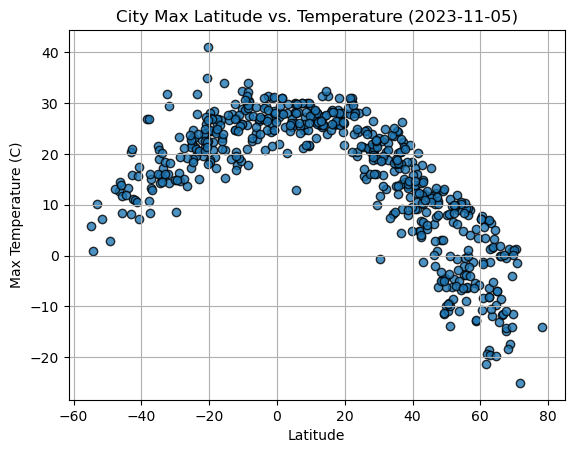

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

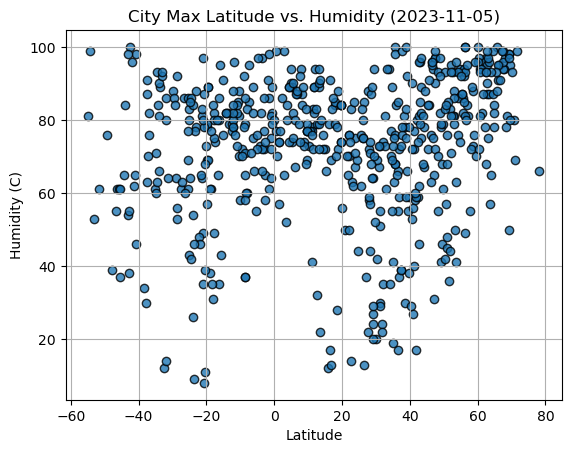

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

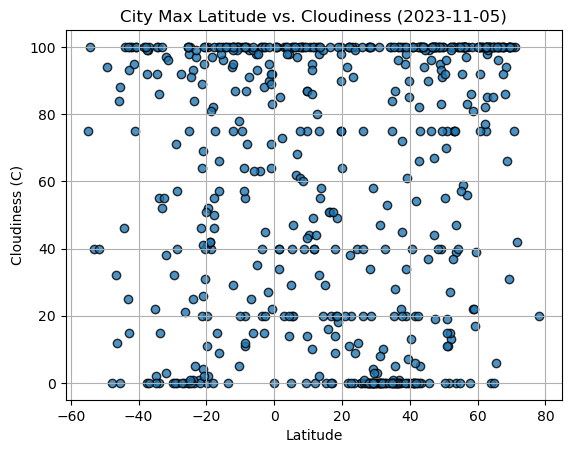

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

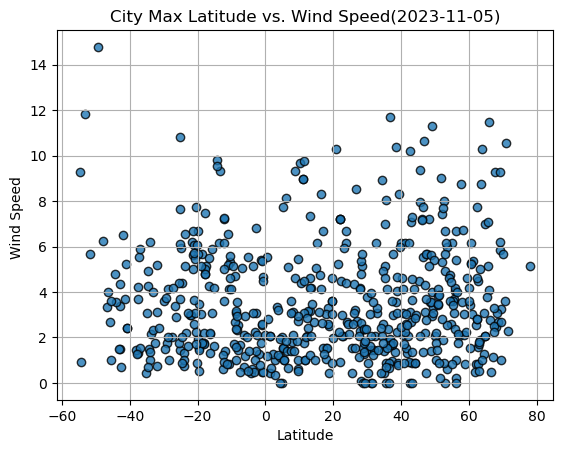

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed(%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Lin_regress(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_data_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
north_hem_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arish,31.1316,33.7984,22.51,73,0,1.43,EG,1699235268
2,ribeira grande,38.5167,-28.7000,13.76,78,95,3.58,PT,1699235269
8,lompoc,34.6391,-120.4579,16.68,89,75,2.57,US,1699235134
11,albany,42.6001,-73.9662,6.87,62,82,3.13,US,1699235193
17,badger,64.8000,-147.5333,-7.02,84,100,2.06,US,1699235273


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_data_df=city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
south_hem_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,salinopolis,-0.6136,-47.3561,27.04,82,92,4.66,BR,1699235268
3,kirando,-7.4167,30.6000,22.43,85,99,1.68,TZ,1699235269
4,neiafu,-18.6500,-173.9833,28.38,61,40,5.66,TO,1699235269
5,invercargill,-46.4000,168.3500,14.45,61,12,4.02,NZ,1699235122
6,kerikeri,-35.2268,173.9474,21.62,61,22,0.45,NZ,1699235270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7596681550316988


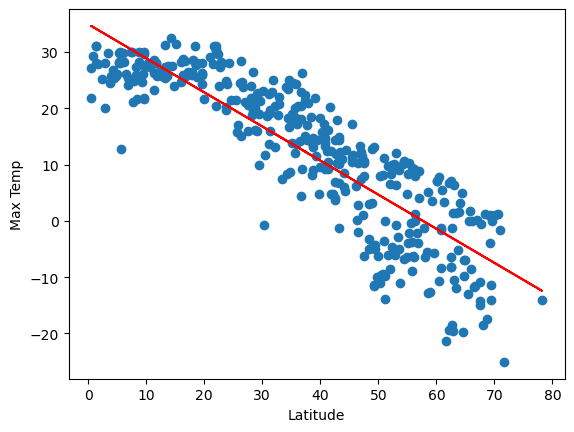

In [15]:
# Linear regression on Northern Hemisphere
x_values = north_hem_data_df["Lat"]
y_values = north_hem_data_df["Max Temp"]
Lin_regress(x_values, y_values, "Max Temp",(10,255))

The r-value is: 0.542310436238868


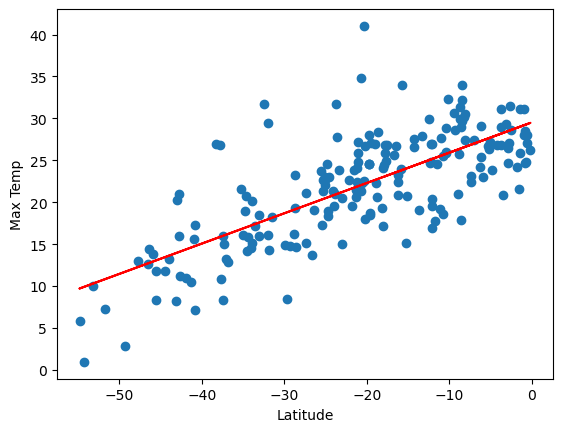

In [16]:
# Linear regression on Southern Hemisphere
x_values = south_hem_data_df["Lat"]
y_values = south_hem_data_df["Max Temp"]
Lin_regress(x_values, y_values, "Max Temp",(10,255))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.039224683793747286


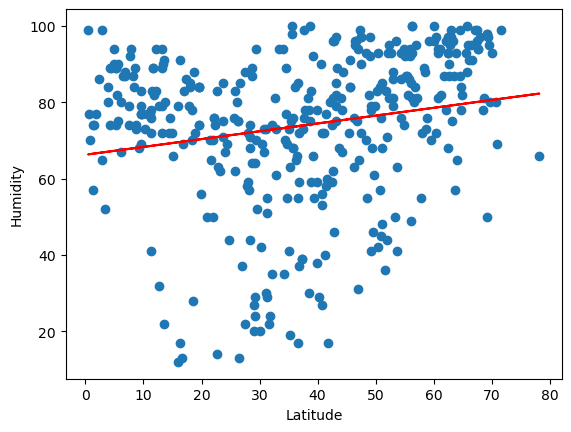

In [17]:
# Northern Hemisphere
x_values = north_hem_data_df["Lat"]
y_values = north_hem_data_df["Humidity"]
Lin_regress(x_values, y_values, "Humidity",(-10,350))

The r-value is: 0.02577068549931125


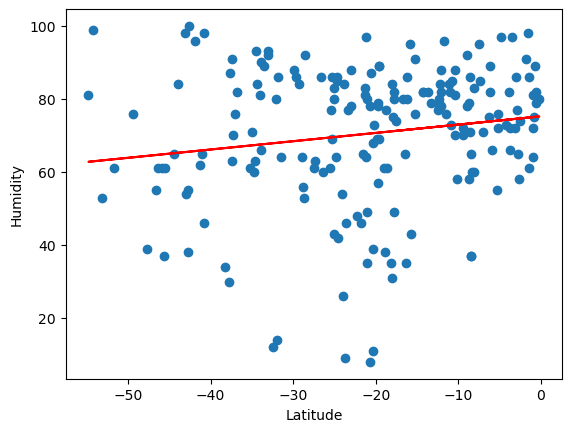

In [18]:
# Southern Hemisphere
x_values = south_hem_data_df["Lat"]
y_values = south_hem_data_df["Humidity"]
Lin_regress(x_values, y_values, "Humidity",(10,255))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04868248240462928


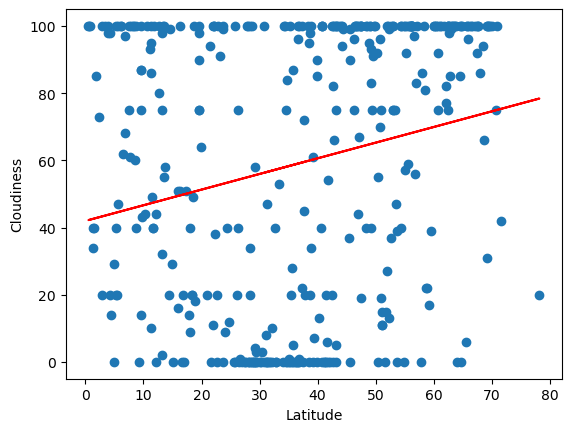

In [19]:
# Northern Hemisphere
x_values = north_hem_data_df["Lat"]
y_values = north_hem_data_df["Cloudiness"]
Lin_regress(x_values, y_values, "Cloudiness",(50,255))

The r-value is: 0.01152334953657914


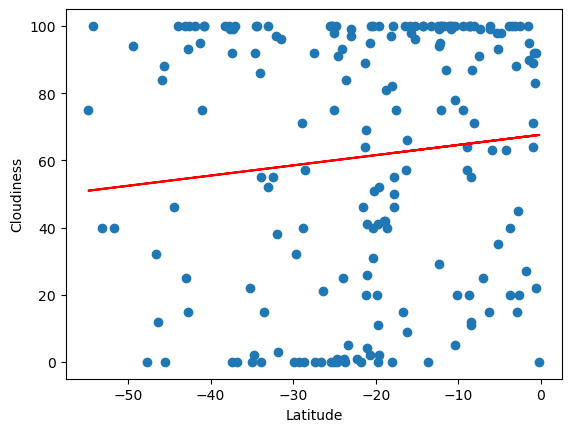

In [20]:
# Southern Hemisphere
x_values = south_hem_data_df["Lat"]
y_values = south_hem_data_df["Cloudiness"]
Lin_regress(x_values, y_values, "Cloudiness",(10,255))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021520281556232677


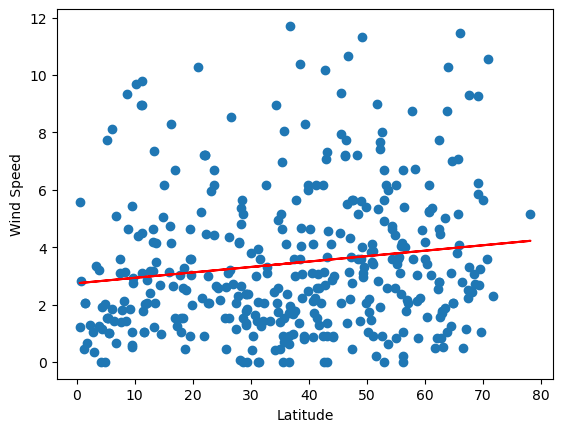

In [21]:
# Northern Hemisphere
x_values = north_hem_data_df["Lat"]
y_values = north_hem_data_df["Wind Speed"]
Lin_regress(x_values, y_values, "Wind Speed",(-20,255))

The r-value is: 0.025221968467708394


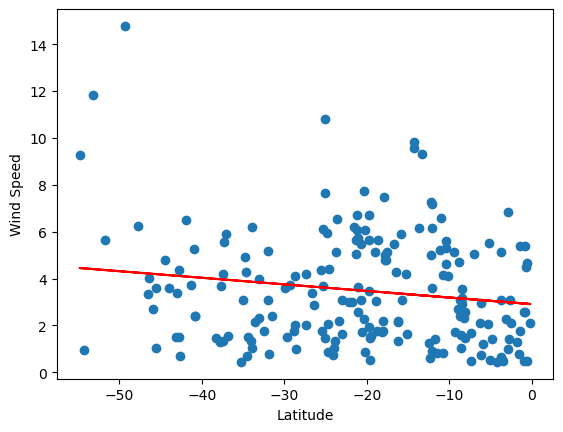

In [22]:
# Southern Hemisphere
x_values = south_hem_data_df["Lat"]
y_values = south_hem_data_df["Wind Speed"]
Lin_regress(x_values, y_values, "Wind Speed",(-10,-50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE